In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import regionmask
import geopandas as gp

In [2]:
data = xr.open_dataset("../data/nsidc_iceage.1984_2020.7daily.nc")

In [3]:
iceage = data.age_of_sea_ice[0,:,:]

In [4]:
lat = data['latitude']
lon = data['longitude']

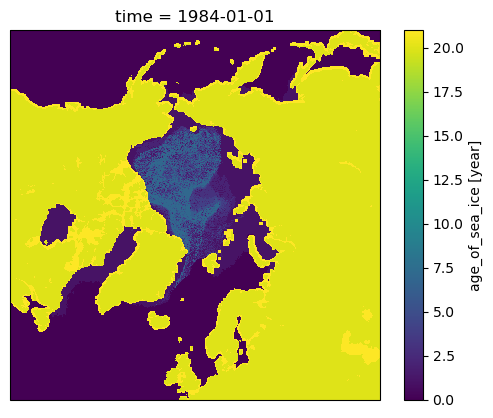

In [18]:
ax = plt.axes(projection = proj)
iceage.plot.pcolormesh(ax=ax)

In [12]:
ArcticSea_shapefile = gp.read_file("../data/ArcticSeaShapefile/iho.shp")
BeringSea_shapefile = gp.read_file("../data/BeringSeaShapefile/iho.shp")
OkhotskSea_shapefile = gp.read_file("../data/OkhotskSeaShapefile/iho.shp")
LabradorSea_shapefile = gp.read_file("../data/LabradorSeaShapefile/iho.shp")

In [13]:
Region_shapefile = ArcticSea_shapefile.append(
                                              [BeringSea_shapefile, OkhotskSea_shapefile, LabradorSea_shapefile],
                                              ignore_index=True)

C:\Users\37\AppData\Local\Temp\ipykernel_15960\3367966721.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Region_shapefile = ArcticSea_shapefile.append(


In [14]:
Region_shapefile.name

0                   Chukchi Sea
1                  Beaufort Sea
2                 Hudson Strait
3                  Davis Strait
4                    Baffin Bay
5                   Lincoln Sea
6                     White Sea
7             East Siberian Sea
8                    Hudson Bay
9     The Northwestern Passages
10                 Arctic Ocean
11                 Barentsz Sea
12                Greenland Sea
13                     Kara Sea
14                   Laptev Sea
15                Norwegian Sea
16                   Bering Sea
17               Sea of Okhotsk
18                 Labrador Sea
Name: name, dtype: object

<GeoAxesSubplot: >

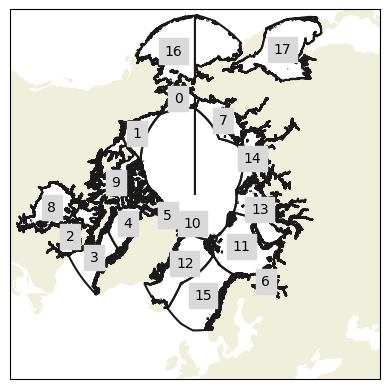

In [9]:
proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_extent([-180,180,50,90],ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)

Region_mask = regionmask.from_geopandas(Region_shapefile,names='name')
Region_mask.plot_regions(ax=ax)

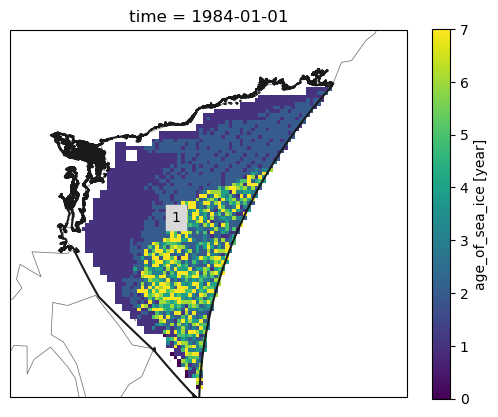

In [56]:
proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
ax = plt.axes(projection= proj)
Arctic_region[[1]].plot(ax=ax)

mask = Arctic_region[[1]].mask(lon,lat)
iceage_mask = iceage.where(np.logical_and(mask==1,iceage<=16))

iceage_mask.plot(ax=ax)
ax.set_extent([-160,-120,70,75],crs=ccrs.PlateCarree())
plt.show()

In [51]:
np.logical_and(iceage!=20,iceage!=1)

<xarray.DataArray 'age_of_sea_ice' (y: 722, x: 722)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * x        (x) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * y        (y) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
    time     datetime64[ns] 1984-01-01